# PARTIE 1 : Analyse exploratoire

## Import librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Lecture des données & nettoyage

In [3]:
# Lecture du fichier csv :
clients = pd.read_csv('./src/clients.csv', sep=';')

In [4]:
print(clients.shape)
clients.head()

(75, 9)


,Id Client,Societe,Ville,Pays,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1,Dupont,Lille,France,NaN,NaN,NaN,NaN,NaN
1,74,Toutbio,Lille,France,NaN,NaN,NaN,NaN,NaN
2,2,Grain,Toulouse,France,NaN,NaN,NaN,NaN,NaN
3,73,Biocompagnie,Nantes,France,NaN,NaN,NaN,NaN,NaN
4,3,Alimentfirst,Rouen,France,NaN,NaN,NaN,NaN,NaN


In [5]:
# Supression des colonnes vides :
for i in range(4,9):
    col_to_drop = f'Unnamed: {i}'
    clients.drop(columns=col_to_drop, inplace=True)

In [6]:
print(clients.shape)
clients.head()

(75, 4)


,Id Client,Societe,Ville,Pays
0,1,Dupont,Lille,France
1,74,Toutbio,Lille,France
2,2,Grain,Toulouse,France
3,73,Biocompagnie,Nantes,France
4,3,Alimentfirst,Rouen,France


In [7]:
# Lecture du fichier csv :
commandes = pd.read_csv('./src/commandes.csv', sep=';')

In [8]:
print(commandes.shape)
commandes.head()

(2155, 9)


,id Commande,id Produit,Quantite,id Client,id Employe,Date,id Transporteur,Unnamed: 7,Unnamed: 8
0,10248,27,5,8,5,"lundi, septembre 25, 2017",3,NaN,NaN
1,10248,11,12,8,5,"lundi, septembre 25, 2017",3,NaN,NaN
2,10248,11,10,8,5,"lundi, septembre 25, 2017",3,NaN,NaN
3,10249,14,9,12,6,"mercredi, novembre 22, 2017",1,NaN,NaN
4,10249,10,40,12,6,"mercredi, novembre 22, 2017",1,NaN,Co


In [9]:
# Supression des colonnes vides :
for i in range(7,9):
    col_to_drop = f'Unnamed: {i}'
    commandes.drop(columns=col_to_drop, inplace=True)

In [10]:
print(commandes.shape)
commandes.head()

(2155, 7)


,id Commande,id Produit,Quantite,id Client,id Employe,Date,id Transporteur
0,10248,27,5,8,5,"lundi, septembre 25, 2017",3
1,10248,11,12,8,5,"lundi, septembre 25, 2017",3
2,10248,11,10,8,5,"lundi, septembre 25, 2017",3
3,10249,14,9,12,6,"mercredi, novembre 22, 2017",1
4,10249,10,40,12,6,"mercredi, novembre 22, 2017",1


In [11]:
# Lecture du fichier csv :
produits = pd.read_csv('./src/produits.csv', sep=';')

In [12]:
print(produits.shape)
produits.head()

(28, 5)


,Id Produit,Produit,Categorie,Prix Unitaire HT,Unnamed: 4
0,1,Favala,Eau,2.0,NaN
1,2,Evie,Eau,5.0,NaN
2,3,Dadi,Eau,3.0,NaN
3,4,Sourcelle,Eau,2.4,NaN
4,5,Vitella,Eau,1.9,NaN


In [13]:
# Suppression de la colonne vide :
produits = produits.iloc[:,:-1]
produits.head()

,Id Produit,Produit,Categorie,Prix Unitaire HT
0,1,Favala,Eau,2.0
1,2,Evie,Eau,5.0
2,3,Dadi,Eau,3.0
3,4,Sourcelle,Eau,2.4
4,5,Vitella,Eau,1.9


## Création d'un dataframe enrichi

In [14]:
# Jointure des dataframes Commandes et Produits :
ventes = pd.merge(commandes, produits, left_on='id Produit', right_on='Id Produit', how='left')

In [15]:
# Suppression des colonnes redondantes suite à la jointure :
ventes.drop(columns='Id Produit', inplace=True)
ventes.head()

,id Commande,id Produit,Quantite,id Client,id Employe,Date,id Transporteur,Produit,Categorie,Prix Unitaire HT
0,10248,27,5,8,5,"lundi, septembre 25, 2017",3,Why,Spiritueux,28.0
1,10248,11,12,8,5,"lundi, septembre 25, 2017",3,Frecha,Boisson gazeuse,6.0
2,10248,11,10,8,5,"lundi, septembre 25, 2017",3,Frecha,Boisson gazeuse,6.0
3,10249,14,9,12,6,"mercredi, novembre 22, 2017",1,Delice,Jus de fruit,4.0
4,10249,10,40,12,6,"mercredi, novembre 22, 2017",1,Contina,Boisson gazeuse,3.9


In [16]:
# Vérification des valeurs manquantes :
ventes.isna().sum()/ventes.shape[0]*100

id Commande         0.0
id Produit          0.0
Quantite            0.0
id Client           0.0
id Employe          0.0
Date                0.0
id Transporteur     0.0
Produit             0.0
Categorie           0.0
Prix Unitaire HT    0.0
dtype: float64

In [17]:
# Ajout de la colonne Montant :
ventes['Montant'] = ventes['Quantite'] * ventes['Prix Unitaire HT']

In [18]:
ventes.head()

,id Commande,id Produit,Quantite,id Client,id Employe,Date,id Transporteur,Produit,Categorie,Prix Unitaire HT,Montant
0,10248,27,5,8,5,"lundi, septembre 25, 2017",3,Why,Spiritueux,28.0,140.0
1,10248,11,12,8,5,"lundi, septembre 25, 2017",3,Frecha,Boisson gazeuse,6.0,72.0
2,10248,11,10,8,5,"lundi, septembre 25, 2017",3,Frecha,Boisson gazeuse,6.0,60.0
3,10249,14,9,12,6,"mercredi, novembre 22, 2017",1,Delice,Jus de fruit,4.0,36.0
4,10249,10,40,12,6,"mercredi, novembre 22, 2017",1,Contina,Boisson gazeuse,3.9,156.0


In [19]:
ventes['Date'][0].split(", ")[1].split(' ')

['septembre', '25']

In [20]:
# Ajout des colonnes Semaine, Mois, Jour, Annee :
ventes['semaine'] = ''
ventes['mois'] = ''
ventes['jour'] = ''
ventes['annee'] = ''

In [21]:
for i in range(0, len(ventes)):
    ventes.loc[i, 'semaine'] = ventes['Date'][i].split(", ")[0]
    ventes.loc[i, 'mois'] = ventes['Date'][i].split(", ")[1].split(' ')[0]
    ventes.loc[i, 'jour'] = ventes['Date'][i].split(", ")[1].split(' ')[1]
    ventes.loc[i, 'annee'] = ventes['Date'][i].split(", ")[2]

In [22]:
ventes.head()

,id Commande,id Produit,Quantite,id Client,id Employe,Date,id Transporteur,Produit,Categorie,Prix Unitaire HT,Montant,semaine,mois,jour,annee
0,10248,27,5,8,5,"lundi, septembre 25, 2017",3,Why,Spiritueux,28.0,140.0,lundi,septembre,25,2017
1,10248,11,12,8,5,"lundi, septembre 25, 2017",3,Frecha,Boisson gazeuse,6.0,72.0,lundi,septembre,25,2017
2,10248,11,10,8,5,"lundi, septembre 25, 2017",3,Frecha,Boisson gazeuse,6.0,60.0,lundi,septembre,25,2017
3,10249,14,9,12,6,"mercredi, novembre 22, 2017",1,Delice,Jus de fruit,4.0,36.0,mercredi,novembre,22,2017
4,10249,10,40,12,6,"mercredi, novembre 22, 2017",1,Contina,Boisson gazeuse,3.9,156.0,mercredi,novembre,22,2017


In [23]:
# Remplacement des mois par leur numéro :
ventes['mois_numero'] = ventes['mois'].apply(
                                                lambda x: 1 if x == 'janvier' 
                                                else 2 if x == 'février'
                                                else 3 if x == 'mars'
                                                else 4 if x == 'avril'
                                                else 5 if x == 'mai'
                                                else 6 if x == 'juin'
                                                else 7 if x == 'juillet'
                                                else 8 if x == 'août'
                                                else 9 if x == 'septembre'
                                                else 10 if x == 'octobre'
                                                else 11 if x == 'novembre'
                                                else 12 if x == 'décembre'
                                                else 0
                                                )

### Statistiques basiques :

Nous observons ceci :
- Badia est la boisson la plus commandée ;
- Les boissons gazeuses sont le type de boisson le plus commandé ;
- Le montant moyen d'une ligne de commande est de 252 € ;
- Le volume moyen d'une ligne de commande est de 23 boissons ;
- Le prix moyen d'une boisson est de 10,68 €. La boisson la plus chère coûte 31 € et la boisson la moins chère coûte 1,90€ ;
- Les commandes s'effectuent le plus souvent le samedi ;
- Avril est le mois qui enregistre le plus de commandes ;
- 2018 est l'année qui enregistre le plus de commandes.

In [24]:
# Statistiques basiques :
ventes.describe(include='all')

,id Commande,id Produit,Quantite,id Client,id Employe,Date,id Transporteur,Produit,Categorie,Prix Unitaire HT,Montant,semaine,mois,jour,annee,mois_numero
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155,2155.000000,2155,2155,2155.000000,2155.000000,2155,2155,2155,2155,2155.000000
unique,NaN,NaN,NaN,NaN,NaN,480,NaN,27,7,NaN,NaN,5,12,31,3,NaN
top,NaN,NaN,NaN,NaN,NaN,"samedi, mars 24, 2018",NaN,Badia,Boisson gazeuse,NaN,NaN,samedi,avril,24,2018,NaN
freq,NaN,NaN,NaN,NaN,NaN,27,NaN,265,586,NaN,NaN,450,277,99,1091,NaN
mean,10659.375870,15.026914,23.827842,31.694200,4.333179,NaN,1.997216,NaN,NaN,10.689466,251.871555,NaN,NaN,NaN,NaN,5.858469
std,241.378032,8.110725,19.026775,18.624166,2.490351,NaN,0.775670,NaN,NaN,9.005289,322.907048,NaN,NaN,NaN,NaN,3.655412
min,10248.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,1.900000,2.400000,NaN,NaN,NaN,NaN,1.000000
25%,10451.000000,7.000000,10.000000,19.000000,2.000000,NaN,1.000000,NaN,NaN,4.400000,61.000000,NaN,NaN,NaN,NaN,3.000000
50%,10657.000000,14.000000,20.000000,30.000000,4.000000,NaN,2.000000,NaN,NaN,6.000000,136.000000,NaN,NaN,NaN,NaN,5.000000
75%,10862.500000,23.000000,30.000000,45.000000,7.000000,NaN,3.000000,NaN,NaN,15.100000,300.000000,NaN,NaN,NaN,NaN,9.000000


## Pistes d'analyse

Questions :

- Comment ont évolué les ventes depuis 2017 ?
- La répartition des ventes par mois est-elle régulière ?
- Existe t-il une saisonnalité dans les ventes ?
- Est-ce que certains jours de la semaine enregistrent plus de vente ?
- Quelles catégories de boisson génèrent le plus de chiffre d'affaires ?
- Quelles catégories de boisson sont les plus vendues ?
- Quelles marques génèrent le plus de chiffre d'affaires ?
- Quelles marques sont les plus vendues ?
- Quelle est la part de chaque catégorie / marque dans le chiffre d'affaires ?
- Quelle est la part de chaque catégorie / marque dans le volume de vente ?

### Évolution des ventes

In [25]:
# Ventes globales (en valeur):
ventes['Montant'].sum()

542783.2

In [26]:
# Ventes globales (en volume) :
ventes['Quantite'].sum()

51349

In [27]:
# Ventes par année (en valeur) :
ca_annuel = ventes.groupby('annee')
ca_annuel['Montant'].sum().sort_index()

annee
2017     81896.6
2018    298485.8
2019    162400.8
Name: Montant, dtype: float64

In [28]:
# Ventes par année (en volume) :
ca_annuel['Quantite'].sum().sort_index()

annee
2017     7168
2018    27832
2019    16349
Name: Quantite, dtype: int64

In [29]:
# Ventes par mois (en valeur) :
ca_mensuel = ventes.groupby(['annee', 'mois_numero'])
ca_mensuel['Montant'].sum().sort_index()

annee  mois_numero
2017   7              10437.9
       8              11854.4
       9              10431.9
       10             15810.7
       11              9808.6
       12             23553.1
2018   1              43995.6
       2              22100.4
       3              15831.6
       4              36057.7
       5              39250.8
       6              15980.8
       7              19232.9
       8              16083.3
       9              25214.4
       10             17558.3
       11             21916.1
       12             25263.9
2019   1              25306.4
       2              50249.4
       3              37427.2
       4              44447.8
       5               4970.0
Name: Montant, dtype: float64

In [30]:
ca_mensuel_df = ca_mensuel['Montant'].sum().sort_index().to_frame().reset_index()

In [31]:
# Ajout de la colonne datetime :
from datetime import datetime

for i in range(0, len(ca_mensuel_df)):
    ca_mensuel_df.loc[i, 'date'] = ca_mensuel_df.loc[i, 'annee'] + '-' + str(ca_mensuel_df.loc[i, 'mois_numero'])

date_format = '%Y-%m'
ca_mensuel_df['datetime'] = ca_mensuel_df['date'].apply(lambda x: datetime.strptime(x, date_format))

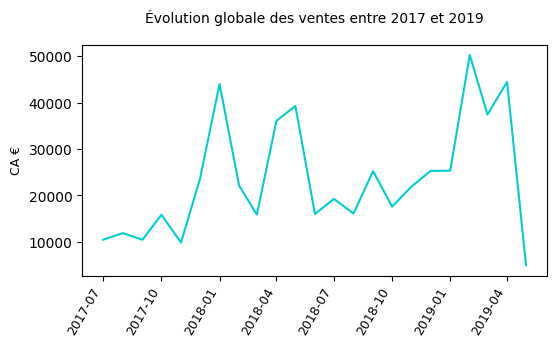

In [79]:
# Visualisation graphique :
plt.figure(figsize=(6,3))
sns.lineplot(x=ca_mensuel_df['datetime'], y=ca_mensuel_df['Montant'], color='darkturquoise')
plt.title('Évolution globale des ventes entre 2017 et 2019', fontsize=10, pad=16)
plt.xlabel('')
plt.ylabel('CA €', fontsize=9)
plt.xticks(fontsize=9, rotation=60, ha="right")
plt.show()

### Saisonnalité

In [33]:
# Ventes selon le mois (toutes années confondues):
ca_mensuel = ventes.groupby('mois_numero')
ca_mensuel['Montant'].sum().sort_index()

mois_numero
1     69302.0
2     72349.8
3     53258.8
4     80505.5
5     44220.8
6     15980.8
7     29670.8
8     27937.7
9     35646.3
10    33369.0
11    31724.7
12    48817.0
Name: Montant, dtype: float64

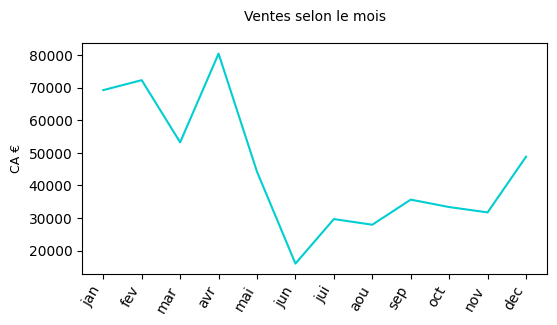

In [80]:
# Visualisation graphique :
plt.figure(figsize=(6,3))
sns.lineplot(data=ca_mensuel['Montant'].sum().sort_index(), color='darkturquoise')
plt.title('Ventes selon le mois', fontsize=10, pad=16)
plt.xlabel('')
plt.ylabel('CA €', fontsize=9)
plt.xticks([i for i in range(1,13)], ['jan', 'fev', 'mar', 'avr', 'mai', 'jun', 'jui', 'aou', 'sep', 'oct', 'nov', 'dec'], fontsize=10, rotation=60, ha="right")
plt.show()

In [35]:
# Ventes selon le jour de la semaine :
ca_semaine = ventes.groupby('semaine')
ca_semaine['Montant'].sum().sort_index()

semaine
dimanche    117596.0
lundi       100994.1
mardi       106942.8
mercredi    105799.0
samedi      111451.3
Name: Montant, dtype: float64

In [36]:
ca_semaine_df = ca_semaine['Montant'].sum().sort_index().to_frame().reset_index()
ca_semaine_df

,semaine,Montant
0,dimanche,117596.0
1,lundi,100994.1
2,mardi,106942.8
3,mercredi,105799.0
4,samedi,111451.3


In [37]:
# Correction de l'indice du samedi :
ca_semaine_df.rename({ 4 : 6 }, axis=0, inplace=True)
ca_semaine_df.rename({ 0 : 7 }, axis=0, inplace=True)
ca_semaine_df

,semaine,Montant
7,dimanche,117596.0
1,lundi,100994.1
2,mardi,106942.8
3,mercredi,105799.0
6,samedi,111451.3


In [38]:
# Ajout des jours de la semaine pour lesquels il n'y a pas de commande :
ca_semaine_df.loc[4] = ['jeudi', 0]
ca_semaine_df.loc[5] = ['vendredi', 0]

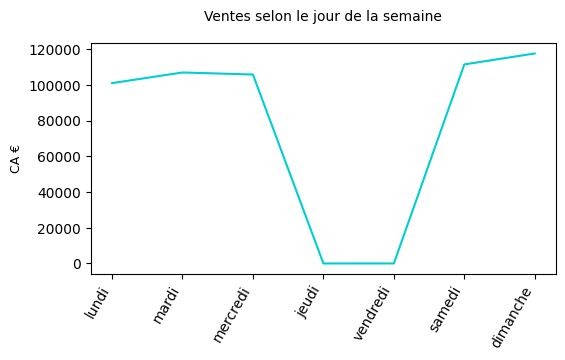

In [84]:
# Visualisation graphique :
plt.figure(figsize=(6,3))
sns.lineplot(data=ca_semaine_df['Montant'].sort_index(), color='darkturquoise')
plt.title('Ventes selon le jour de la semaine', fontsize=10, pad=16)
plt.xlabel('')
plt.ylabel('CA €', fontsize=9)
plt.xticks([i for i in range(1,8)], ['lundi','mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'], fontsize=10, rotation=60, ha="right")
plt.show()

### Ventes par catégorie et marque

--> Les spiritueux rapportent le plus de CA  
--> Ils représentent 40% du CA total  
--> Les boissons gazeuses sont le plus vendues en volume (14000 boissons)  
--> Elles représentent 28% du volume total  
--> Le whisky Why est le produit qui génère le plus de CA  
--> La boisson gazeuse Badia est le produit qui est le plus vendu en volume (env. 7000 boissons)

In [40]:
# Ventes par catégorie (en valeur) :
ventes.groupby('Categorie')['Montant'].sum().sort_values(ascending=False)

Categorie
Spiritueux             219701.0
Vin                     98678.8
Boisson gazeuse         71398.8
Biere                   65919.6
Jus de fruit            35159.3
Boisson energetique     32189.5
Eau                     19736.2
Name: Montant, dtype: float64

In [41]:
# En pourcentage :
ventes.groupby('Categorie')['Montant'].sum().sort_values(ascending=False)/ventes['Montant'].sum()*100

Categorie
Spiritueux             40.476750
Vin                    18.180150
Boisson gazeuse        13.154202
Biere                  12.144738
Jus de fruit            6.477595
Boisson energetique     5.930453
Eau                     3.636111
Name: Montant, dtype: float64

In [42]:
# Ventes par catégorie (en volume) :
ventes.groupby('Categorie')['Quantite'].sum().sort_values(ascending=False)

Categorie
Boisson gazeuse        14261
Spiritueux              7649
Eau                     6529
Biere                   6150
Jus de fruit            6137
Boisson energetique     5336
Vin                     5287
Name: Quantite, dtype: int64

In [43]:
# En pourcentage :
ventes.groupby('Categorie')['Quantite'].sum().sort_values(ascending=False)/ventes['Quantite'].sum()*100

Categorie
Boisson gazeuse        27.772693
Spiritueux             14.896103
Eau                    12.714951
Biere                  11.976864
Jus de fruit           11.951547
Boisson energetique    10.391634
Vin                    10.296208
Name: Quantite, dtype: float64

In [44]:
# La marque qui génère le plus de CA :
ventes.groupby('Produit')['Montant'].sum().sort_values(ascending=False)

Produit
Why                162568.0
Scotty              57133.0
Château du lion     54496.5
Kros                36690.0
Badia               34825.0
Château Pierre      27829.3
Heine               15729.6
Frecha              14748.0
fricht              14718.6
Draught             13500.0
Saint prieur        12456.0
Orana                9778.4
Spit                 9589.9
Contina              9523.8
Frutel               9493.0
Aprico               9151.9
cacolaa              7881.0
Evie                 6940.0
Acqua                6906.0
Delice               6736.0
Dadi                 5820.0
Chateua de lay       3897.0
Sourcelle            3895.2
Perria               3526.0
Mialena              1870.0
Favala               1656.0
Vitella              1425.0
Name: Montant, dtype: float64

In [45]:
# La marque la plus vendue (en volume) :
ventes.groupby('Produit')['Quantite'].sum().sort_values(ascending=False)

Produit
Badia              6965
Why                5806
Kros               3669
Frecha             2458
Contina            2442
Spit               2339
Château du lion    2319
Dadi               1940
fricht             1887
Château Pierre     1843
Scotty             1843
Frutel             1726
Delice             1684
Sourcelle          1623
Orana              1438
Evie               1388
Heine              1356
Aprico             1289
Acqua              1151
Draught            1125
cacolaa            1110
Favala              828
Perria              820
Vitella             750
Saint prieur        692
Chateua de lay      433
Mialena             425
Name: Quantite, dtype: int64

### Montant moyen d'une commande

--> Il y a 830 commmandes au total  
--> Le montant moyen d'une commande est de 654 €

In [47]:
# Le nombre de commandes uniques :
ventes['id Commande'].nunique()

830

In [46]:
ventes_copy = ventes.copy()
ventes_copy['mois_numero'] = ventes_copy['mois'].apply(
                                                lambda x: '1' if x == 'janvier' 
                                                else '2' if x == 'février'
                                                else '3' if x == 'mars'
                                                else '4' if x == 'avril'
                                                else '5' if x == 'mai'
                                                else '6' if x == 'juin'
                                                else '7' if x == 'juillet'
                                                else '8' if x == 'août'
                                                else '9' if x == 'septembre'
                                                else '10' if x == 'octobre'
                                                else '11' if x == 'novembre'
                                                else '12' if x == 'décembre'
                                                else ''
                                                )

In [48]:
par_commande = ventes_copy.groupby('id Commande')
calcul = pd.DataFrame({'total': par_commande['Montant'].sum(), 'annee': par_commande['annee'].max(), 'mois': par_commande['mois_numero'].max(), 'jour': par_commande['jour'].max()})

In [49]:
# Le montant moyen d'une commande : 
calcul['total'].mean()

653.9556626506023

### Visualisation de l'évolution des ventes

In [50]:
calcul_sorted = calcul.sort_values(by=['annee', 'mois', 'jour'], ascending=[True, True, True])

In [51]:
calcul_sorted['date_str'] = calcul_sorted['annee'] + '-' + calcul_sorted['mois'] + '-' + calcul_sorted['jour']

In [52]:
from datetime import datetime
date_format = '%Y-%m-%d'
calcul_sorted['datetime'] = calcul_sorted['date_str'].apply(lambda x: datetime.strptime(x, date_format))

In [53]:
calcul_sorted = calcul_sorted.sort_values(by='datetime')

In [54]:
calcul_sorted.head(10)

,total,annee,mois,jour,date_str,datetime
id Commande,,,,,,
11044,60.0,2017,7,01,2017-7-01,2017-07-01
10998,1087.0,2017,7,02,2017-7-02,2017-07-02
10906,75.0,2017,7,08,2017-7-08,2017-07-08
10870,33.3,2017,7,08,2017-7-08,2017-07-08
10792,152.0,2017,7,09,2017-7-09,2017-07-09
10611,137.0,2017,7,10,2017-7-10,2017-07-10
10374,255.0,2017,7,11,2017-7-11,2017-07-11
11005,54.0,2017,7,12,2017-7-12,2017-07-12
10910,249.2,2017,7,15,2017-7-15,2017-07-15


In [55]:
print(type(calcul_sorted.loc[10998, 'date_str']))
print(type(calcul_sorted.loc[10998, 'datetime']))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Graphiques

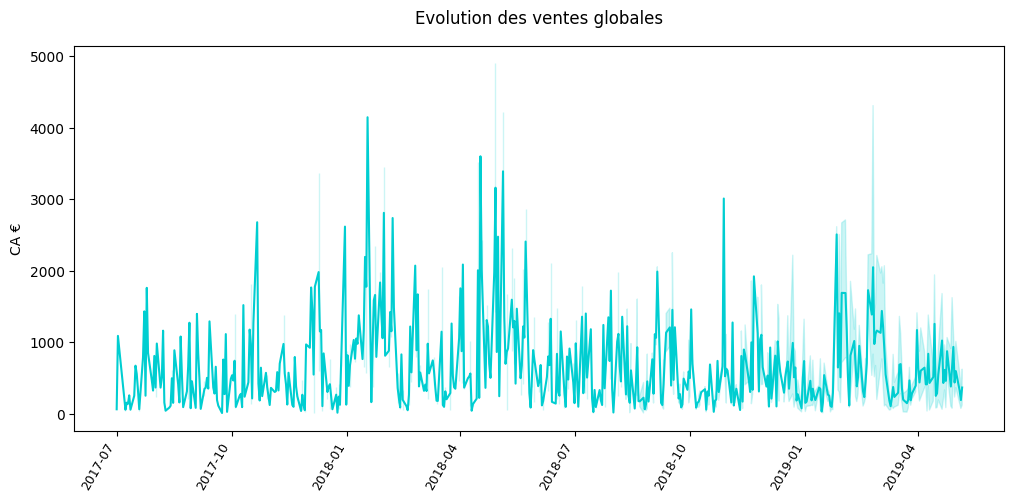

In [87]:
plt.figure(figsize=(12,5))
sns.lineplot(data=calcul_sorted, x="datetime", y="total", color='darkturquoise')
plt.title('Evolution des ventes globales', fontsize=12, pad=16)
plt.xlabel('')
plt.ylabel('CA €')
plt.xticks(fontsize=9, rotation=60, ha="right")
plt.show()

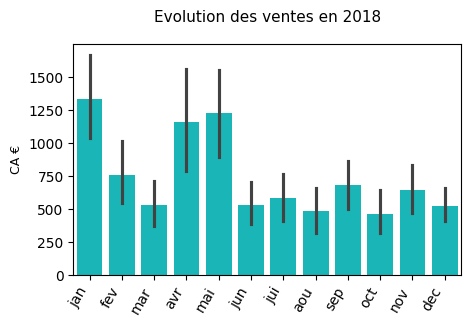

In [97]:
# Représentation en barres pour l'année 2008 :
plt.figure(figsize=(5,3))
sns.barplot(data=calcul_sorted[calcul_sorted['annee']=='2018'], x="mois", y="total", color='darkturquoise')
plt.title('Evolution des ventes en 2018', fontsize=11, pad=16)
plt.xlabel('')
plt.ylabel('CA €', fontsize=9)
plt.xticks([i for i in range(0,12)], ['jan', 'fev', 'mar', 'avr', 'mai', 'jun', 'jui', 'aou', 'sep', 'oct', 'nov', 'dec'], fontsize=10, rotation=60, ha="right")
plt.show()

### Performance des vendeurs

In [59]:
# Lecture des données csv :
vendeurs = pd.read_csv('./src/employes.csv', sep=';')
vendeurs.drop(columns='Unnamed: 4', inplace=True)

In [60]:
# Nombre de commandes par vendeur :
ventes.groupby('id Employe')['id Commande'].nunique()

id Employe
1    123
2     96
3    127
4    156
5     42
6     67
7     72
8    104
9     43
Name: id Commande, dtype: int64

In [61]:
# En pourcentage :
ventes.groupby('id Employe')['id Commande'].nunique()/830*100 

id Employe
1    14.819277
2    11.566265
3    15.301205
4    18.795181
5     5.060241
6     8.072289
7     8.674699
8    12.530120
9     5.180723
Name: id Commande, dtype: float64

In [62]:
# Le CA généré par vendeur :
temp = ventes.groupby('id Employe')
par_employe = pd.DataFrame({'par employe': temp['Montant'].sum()}).reset_index()
par_employe

,id Employe,par employe
0,1,86532.3
1,2,57848.0
2,3,85978.0
3,4,106733.4
4,5,32701.9
5,6,36715.5
6,7,47167.7
7,8,62555.5
8,9,26550.9


In [63]:
# Les meilleures performances des vendeurs :
par_employe.sort_values(by='par employe', ascending=False)

,id Employe,par employe
3,4,106733.4
0,1,86532.3
2,3,85978.0
7,8,62555.5
1,2,57848.0
6,7,47167.7
5,6,36715.5
4,5,32701.9
8,9,26550.9


In [64]:
# Top 3 meilleurs vendeurs :
best_perf = pd.merge(par_employe, vendeurs, left_on='id Employe', right_on='Id Employe', how='left')
best_perf.drop(columns='Id Employe', inplace=True)
best_perf.sort_values(by='par employe', ascending=False).head(3)

,id Employe,par employe,Nom Vendeur,Prenom,Service
3,4,106733.4,Favier,Erwan,AC2
0,1,86532.3,Weil,Emma,CO1
2,3,85978.0,Vesoul,Claude,AC1


In [65]:
# Top 3 meilleurs vendeurs (en volume) :
par_volume = ventes.groupby('id Employe')['Quantite'].sum().sort_values(ascending=False).to_frame().reset_index()
best_volume = pd.merge(par_volume, vendeurs, left_on='id Employe', right_on='Id Employe', how='left')
best_volume.drop(columns='Id Employe', inplace=True)
best_volume.sort_values(by='Quantite', ascending=False).head(3)

,id Employe,Quantite,Nom Vendeur,Prenom,Service
0,4,9783,Favier,Erwan,AC2
1,3,7852,Vesoul,Claude,AC1
2,1,7819,Weil,Emma,CO1


### Clients & critère géographique

Nous observons ceci : 

- Les 3 meilleurs clients sont Belges, Chiliens et Espagnols ;
- Les ventes s'effectuent dans 23 pays et 69 villes différentes ; 
- La France est le pays qui enregistre le plus de commandes ; 
- Lille est la ville qui enregistre le plus de commandes ;
- Le CA moyen généré par client est de 7237 € ;
- La France, les Etats-Unis et la Belgique réalisent le plus de CA.

In [ ]:
# Les meilleurs clients en terme de CA généré :
temp = ventes.groupby('id Client')
par_client = pd.DataFrame({'par client': temp['Montant'].sum().sort_values(ascending=False)}).reset_index()

In [67]:
# Top 10 meilleurs clients :
par_client_enrichi = pd.merge(par_client, clients, left_on='id Client', right_on='Id Client', how='left')
par_client_enrichi.drop(columns='Id Client', inplace=True)
par_client_enrichi.head(10)

,id Client,par client,Societe,Ville,Pays
0,31,38148.6,Alimat,Bruxelles,Belgique
1,20,37633.8,Elpozo,Santiago,Chili
2,19,35652.3,Miguel,Alicante,Espagne
3,32,23086.1,Heine,Amsterdam,Pays Bas
4,7,18940.6,Local et compagine,Rouen,France
5,35,15383.3,Hershey,Los Angeles,Etats Unis
6,21,14697.8,Freixe,Coquimbo,Chili
7,34,14277.1,Westley,Las Vegas,Etats Unis
8,30,13722.1,Ko Food,Anvers,Belgique
9,9,13120.8,Krot,Stuttgart,Allemagne


In [68]:
# Statistiques basiques :
par_client_enrichi.describe(include='all')

,id Client,par client,Societe,Ville,Pays
count,75.000000,75.000000,75,75,75
unique,NaN,NaN,75,69,23
top,NaN,NaN,Alimat,Lille,France
freq,NaN,NaN,1,2,14
mean,38.000000,7237.109333,NaN,NaN,NaN
std,21.794495,7784.992095,NaN,NaN,NaN
min,1.000000,62.000000,NaN,NaN,NaN
25%,19.500000,2252.500000,NaN,NaN,NaN
50%,38.000000,5464.000000,NaN,NaN,NaN
75%,56.500000,9390.400000,NaN,NaN,NaN


In [69]:
# CA par pays :
par_client_enrichi.groupby('Pays')['par client'].sum().sort_values(ascending=False)

Pays
France         63972.4
Etats Unis     63459.3
Belgique       60634.5
Chili          52331.6
Allemagne      51780.2
Espagne        44129.2
Pays Bas       29103.2
Canada         21766.4
Suede          18891.2
Royaume Uni    18669.5
Irelande       18332.0
Norvege        15528.8
Italie         13304.4
Chine          12475.2
Argentine      11963.5
Mexique        11702.9
Japon          11553.5
Viet Nam        7633.4
Australie       5315.1
Croatie         4822.1
Danemark        3378.5
Finlande        1544.9
CANADA           491.4
Name: par client, dtype: float64

In [70]:
# En pourcentage :
par_client_enrichi.groupby('Pays')['par client'].sum().sort_values(ascending=False).head(10)/par_client_enrichi.groupby('Pays')['par client'].sum().sum()*100

Pays
France         11.785995
Etats Unis     11.691464
Belgique       11.171035
Chili           9.641345
Allemagne       9.539757
Espagne         8.130171
Pays Bas        5.361846
Canada          4.010146
Suede           3.480432
Royaume Uni     3.439587
Name: par client, dtype: float64

## Recommandations : KPI retenus

Nous assumons que le tableau de bord est à destination des équipes commerciales (vendeurs et managers).

Nous retenons les KPI suivants pour la réalisation du tableau de bord : 

- CA global tous pays
    - En valeur
    - En volume

- Graphique d'évolution du CA
    - Par année
    - Par pays

- Catégorie et marque de boisson les plus vendues
    - En valeur
    - En volume
